In [1]:
# suppressWarnings(suppressMessages(library(jsonlite)))
# suppressWarnings(suppressMessages(library(tidyjson)))
suppressWarnings(suppressMessages(library(plyr)))
suppressWarnings(suppressMessages(library(dplyr)))
suppressWarnings(suppressMessages(library(recommenderlab)))
suppressWarnings(suppressMessages(library(knitr)))
suppressWarnings(suppressMessages(library(tidyr)))
suppressWarnings(suppressMessages(library(ggplot2)))

# user-item matrix
suppressWarnings(suppressMessages(library(stringi)))
suppressWarnings(suppressMessages(library(Matrix)))
suppressWarnings(suppressMessages(library(DT)))


In [2]:
business<- read.csv("./restaurant_dataset/business.csv")

In [3]:
user <- read.csv("./restaurant_dataset/user_1.csv")

for (i in c(2:4)){
  a<- paste0('./restaurant_dataset/user_',i,'.csv')
  user_1 <- read.csv(a)
  user <- rbind(user, user_1)
}

In [4]:
user


X,user_id,name,review_count,useful,funny,cool,fans,average_stars
1,EZmocAborM6z66rTzeZxzQ,Rob,761,18456,12316,17579,298,3.59
2,myql3o3x22_ygECb8gVo7A,Vivian,80,117,28,104,34,4.29
3,FIk4lQQu1eTe2EpzQ4xhBA,Carol,841,58,6,5,48,4.15
4,ojovtd9c8GIeDiB8e0mq2w,Miss Maggie,376,42,51,42,28,3.82
5,uVEoZmmL9yK0NMgadLL0CQ,Jeremy,28,8,3,3,2,2.97
6,TprC8sujz8MkwuomrqUSiw,Ramsey,194,5,0,0,9,3.76
7,De-dImXf-TOFWWPTUWwIvw,Ben,111,18,11,11,4,4.04
8,vWXDkGEvICWNCjBW_fKBlg,Carrie,260,89,21,17,21,3.73
9,JMTr179r5SGHC_rPUBSWfQ,Slavisa,30,23,7,2,1,3.42
10,s7XIFcwZnhEUMzSZ4EiAHA,Javier,96,29,8,8,3,3.39


In [5]:

rating <- read.csv("./restaurant_dataset/rating_1.csv")

for (i in c(2:7)){
  a<- paste0(cat('"'),'./restaurant_dataset/rating_',i,'.csv',cat('"'))
  rating_1 <- read.csv(a)
  rating <- rbind(rating, rating_1)
}

""""""""""""

In [6]:
rating

X,user_id,business_id,document.id,stars,useful,funny,cool,restaurant,user
1,---1lKK3aKOuomHnwAkAow,YCEZLECK9IToE8Mysorbhw,54219,5,3,0,2,Daily Kitchen Modern Eatery and Rotisserie,Monera
2,---1lKK3aKOuomHnwAkAow,D1PhUlkQA1ZsVe9Cx4yqOw,14186,5,1,1,0,The Placenta Lady,Monera
3,---1lKK3aKOuomHnwAkAow,5aeR9KcboZmhDZlFscnYRA,3864,5,1,0,0,Fresh Mama,Monera
4,---1lKK3aKOuomHnwAkAow,t6WY1IrohUecqNjd9bG42Q,51335,4,2,0,0,Red Velvet Cafe,Monera
5,---1lKK3aKOuomHnwAkAow,igHYkXZMLAc9UdV5VnR_AA,3774,5,0,0,0,Echo & Rig,Monera
6,---1lKK3aKOuomHnwAkAow,OicpDroqnfmbtw5jSgf4lQ,5614,5,0,0,0,Craig P Kenny & Associates,Monera
7,---1lKK3aKOuomHnwAkAow,d7Jgj1h_MILumtsTlb2aXA,55949,5,1,0,1,Aloha Aquatic Center,Monera
8,---1lKK3aKOuomHnwAkAow,OnnvNs2JJ-B2xbwHEHbWDw,31032,5,1,0,0,Royal Printing,Monera
9,---1lKK3aKOuomHnwAkAow,nVcMNfey80dCQg35h9uAXA,74442,5,1,0,0,Vexed By Design,Monera
10,---1lKK3aKOuomHnwAkAow,kosTPb88O4Q0XGbVbEOGCA,41728,4,1,0,0,Prommares Thai Food,Monera


In [7]:
rating_copy  <- rating

rating <- rating[,c("restaurant", "business_id", "user", "user_id","stars", "useful", "funny", "cool" ,"document.id")]

kable(head(rating,n=5))



|restaurant                                 |business_id            |user   |user_id                | stars| useful| funny| cool| document.id|
|:------------------------------------------|:----------------------|:------|:----------------------|-----:|------:|-----:|----:|-----------:|
|Daily Kitchen Modern Eatery and Rotisserie |YCEZLECK9IToE8Mysorbhw |Monera |---1lKK3aKOuomHnwAkAow |     5|      3|     0|    2|       54219|
|The Placenta Lady                          |D1PhUlkQA1ZsVe9Cx4yqOw |Monera |---1lKK3aKOuomHnwAkAow |     5|      1|     1|    0|       14186|
|Fresh Mama                                 |5aeR9KcboZmhDZlFscnYRA |Monera |---1lKK3aKOuomHnwAkAow |     5|      1|     0|    0|        3864|
|Red Velvet Cafe                            |t6WY1IrohUecqNjd9bG42Q |Monera |---1lKK3aKOuomHnwAkAow |     4|      2|     0|    0|       51335|
|Echo & Rig                                 |igHYkXZMLAc9UdV5VnR_AA |Monera |---1lKK3aKOuomHnwAkAow |     5|      0|     0|    0|        377

In [8]:
rating

restaurant,business_id,user,user_id,stars,useful,funny,cool,document.id
Daily Kitchen Modern Eatery and Rotisserie,YCEZLECK9IToE8Mysorbhw,Monera,---1lKK3aKOuomHnwAkAow,5,3,0,2,54219
The Placenta Lady,D1PhUlkQA1ZsVe9Cx4yqOw,Monera,---1lKK3aKOuomHnwAkAow,5,1,1,0,14186
Fresh Mama,5aeR9KcboZmhDZlFscnYRA,Monera,---1lKK3aKOuomHnwAkAow,5,1,0,0,3864
Red Velvet Cafe,t6WY1IrohUecqNjd9bG42Q,Monera,---1lKK3aKOuomHnwAkAow,4,2,0,0,51335
Echo & Rig,igHYkXZMLAc9UdV5VnR_AA,Monera,---1lKK3aKOuomHnwAkAow,5,0,0,0,3774
Craig P Kenny & Associates,OicpDroqnfmbtw5jSgf4lQ,Monera,---1lKK3aKOuomHnwAkAow,5,0,0,0,5614
Aloha Aquatic Center,d7Jgj1h_MILumtsTlb2aXA,Monera,---1lKK3aKOuomHnwAkAow,5,1,0,1,55949
Royal Printing,OnnvNs2JJ-B2xbwHEHbWDw,Monera,---1lKK3aKOuomHnwAkAow,5,1,0,0,31032
Vexed By Design,nVcMNfey80dCQg35h9uAXA,Monera,---1lKK3aKOuomHnwAkAow,5,1,0,0,74442
Prommares Thai Food,kosTPb88O4Q0XGbVbEOGCA,Monera,---1lKK3aKOuomHnwAkAow,4,1,0,0,41728


In [9]:
udf <- data.frame(user_No= seq(1:length(unique(rating[,"user"]))),user= unique(rating[,"user"]))
idf <- data.frame(restaurant_No= seq(1:length(unique(rating[,"restaurant"]))),restaurant=unique(rating[,"restaurant"]))

rating <- merge(rating,udf,by.x='user',by.y='user')
rating <- merge(rating,idf,by.x='restaurant',by.y='restaurant')



In [10]:
rating

restaurant,user,business_id,user_id,stars,useful,funny,cool,document.id,user_No,restaurant_No
:10 Minute Manicure,Lindsay,1M9kELc6SDZDs3UPMDRF6Q,0ltgWEg8_n8BMmul-ETa4Q,4,0,0,0,151,428,24812
:10 Minute Manicure,Crystal,1M9kELc6SDZDs3UPMDRF6Q,jVYzrVblDFSuL3GHtt8ZSA,4,2,0,2,154,292,24812
:10 Minute Manicure,ML,1M9kELc6SDZDs3UPMDRF6Q,1pZnXhra1y0R_IFpIUyVvw,5,0,0,0,152,4351,24812
:10 Minute Manicure,R.,1M9kELc6SDZDs3UPMDRF6Q,Eq3Pr0AHAngWA1UW7PB6-A,2,0,0,0,153,1541,24812
.99 Cent Pizza Place,Chris,B8GKsrIRRLChyFioejPINg,6ywZ6BHXvdas8o-omBli8g,3,0,0,0,2602,340,44914
.99 Cent Pizza Place,JoAnne,B8GKsrIRRLChyFioejPINg,fANvDmI6BiFGaEd9qC630A,3,0,0,0,2603,1503,44914
.99 Cent Pizza Place,E,B8GKsrIRRLChyFioejPINg,Vr3SHxUYhxa9q5QBwoYdBQ,4,3,0,1,2601,176,44914
.99 Cent Pizza Place,Pamela,B8GKsrIRRLChyFioejPINg,KcXa27KaMt93L6fq_sbaug,5,1,0,2,2604,1657,44914
.99 Cent Pizza Place,J. P.,B8GKsrIRRLChyFioejPINg,U5SyLOejvB1_wLRq_nN2gA,4,0,0,1,2605,53222,44914
.99 Cent Pizza Place,Greg,B8GKsrIRRLChyFioejPINg,CIJsgEIJJT89KJemnaWW0A,4,2,0,1,2599,187,44914


In [11]:
rating_mx <- sparseMatrix(
  i =  rating$user_No, 
  j =  rating$restaurant_No, 
  x = rating$stars, 
  dimnames = list(levels(rating$user_No), levels(rating$restaurant_No))
)


mx <- as(rating_mx,"realRatingMatrix")



In [12]:
mx

63076 x 65432 rating matrix of class ‘realRatingMatrix’ with 1409141 ratings.

In [13]:
colnames(mx) <- paste("R", 1:65432, sep = "")
as(mx[1,1:10],"list")


[[1]]
 R1  R2  R3  R4  R5  R6  R7  R8  R9 R10 
  5   5   5   4   5   5   5   5   5   4

In [14]:
rownames(mx) <- paste("U", 1:63076, sep = "")
as(mx[1,1:10], "list")

$U1
 R1  R2  R3  R4  R5  R6  R7  R8  R9 R10 
  5   5   5   4   5   5   5   5   5   4

In [15]:
mx_n <- normalize(mx)

getRatingMatrix(mx)[1:10,1:6]

10 x 6 sparse Matrix of class "dgCMatrix"
    R1 R2 R3 R4 R5 R6
U1   5  5  5  4  5  5
U2   .  .  .  .  5  .
U3   .  .  .  .  .  .
U4   .  .  .  .  .  .
U5   .  .  .  .  .  .
U6   .  .  .  1  5  .
U7   .  .  .  4  5  .
U8   1  .  .  .  5  .
U9   .  .  .  .  .  .
U10  .  .  .  4  .  .

In [16]:
summary(rating[, 'stars'])

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   3.000   4.000   3.716   5.000   5.000 

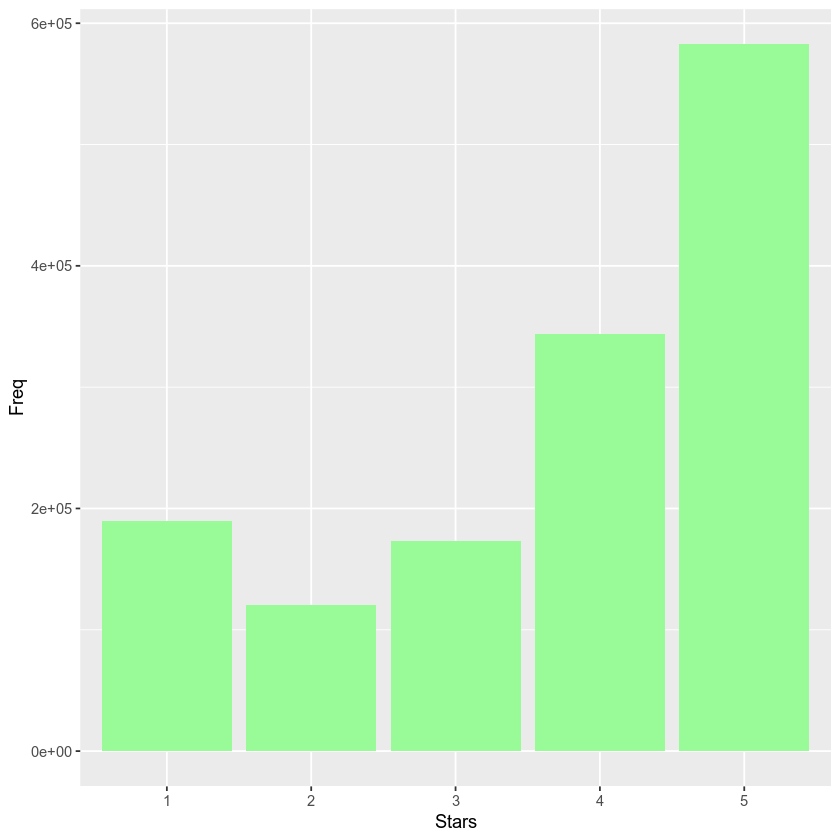

In [17]:
#graph
rating_frq <- as.data.frame(table(rating$stars))

ggplot(rating_frq,aes(Var1,Freq)) +   
  geom_bar(aes(fill = Var1), position = "dodge", stat="identity",fill="palegreen")+ labs(x = "Stars")

In [18]:
business_mean <- data.frame(restaurant = idf$restaurant, average_stars=colMeans(mx))

business_mean

,restaurant,average_stars
R1,Daily Kitchen Modern Eatery and Rotisserie,3.522124
R2,The Placenta Lady,5.000000
R3,Fresh Mama,3.465116
R4,Red Velvet Cafe,3.595142
R5,Echo & Rig,4.333773
R6,Craig P Kenny & Associates,4.519481
R7,Aloha Aquatic Center,3.800000
R8,Royal Printing,5.000000
R9,Vexed By Design,4.666667
R10,Prommares Thai Food,4.108844


In [19]:
#prerequisites to recommender
mx@data@x[mx@data@x[] > 5] <- 5


mx_r <- mx[rowCounts(mx) > 20,]
mx_r <- mx_r[,colCounts(mx_r) > 50]


set.seed(1)
(e <- evaluationScheme(mx_r[1:1200], method = "split",train = 0.8, given = 5, goodRating = 3, k=5))

Evaluation scheme with 5 items given
Method: ‘split’ with 5 run(s).
Training set proportion: 0.800
Good ratings: >=3.000000
Data set: 1200 x 5243 rating matrix of class ‘realRatingMatrix’ with 488248 ratings.

In [20]:
(r_ubcf <- Recommender(getData(e, "train"), method ="UBCF", parameter = list(method = "cosine", normalize = "Z-score", nn=25)))

Recommender of type ‘UBCF’ for ‘realRatingMatrix’ 
learned using 960 users.

In [21]:
gc()


,used,(Mb),gc trigger,(Mb),max used,(Mb)
Ncells,3375668,180.3,8273852,441.9,8273852,441.9
Vcells,47856314,365.2,96995691,740.1,96994689,740.1


In [22]:
memory.limit(size=700000)

Warning message:
“'memory.limit()' is Windows-specific”

[1] Inf

In [23]:
names(getModel(r_ubcf))

[1] "description" "data"        "method"      "nn"          "sample"     
[6] "normalize"   "verbose"

In [24]:
results <- evaluate(e, method="UBCF", type = "ratings", n=c(1,3,5,10,15,20))

UBCF run fold/sample [model time/prediction time]
	 1  [0.082sec/6.262sec] 
	 2  [0.043sec/6.296sec] 
	 3  [0.158sec/5.805sec] 
	 4  [0.04sec/6.081sec] 
	 5  [0.04sec/6.072sec] 


In [25]:
avg(results)

,RMSE,MSE,MAE
res,1.47252,2.168384,1.209001


In [26]:
as(getData(e,"unknown"),"matrix")

,R1,R3,R4,R5,R6,R10,R11,R12,R13,R17,⋯,R30658,R30793,R31107,R31202,R31796,R32325,R32640,R34516,R36903,R39124
U11,2,NA,NA,5,NA,NA,5,NA,4,3,⋯,NA,5,NA,3,NA,NA,NA,NA,NA,5
U31,NA,NA,NA,NA,NA,NA,NA,2,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
U40,NA,NA,NA,NA,NA,NA,NA,NA,NA,4,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
U41,NA,3,4,5,NA,NA,4,3,4,NA,⋯,NA,5,NA,NA,4,NA,NA,NA,4,NA
U43,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
U45,NA,NA,NA,NA,NA,NA,3,NA,NA,3,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
U46,4,NA,1,4,5,NA,5,3,4,NA,⋯,4,NA,NA,1,NA,NA,4,5,NA,5
U53,NA,NA,2,4,NA,NA,NA,1,4,NA,⋯,NA,NA,NA,NA,NA,NA,2,NA,NA,NA
U54,NA,NA,NA,4,NA,5,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
U59,NA,2,NA,5,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


In [27]:
write.table(as(getData(e,"known"),"matrix"), file = "yo.csv", append = FALSE, sep = " ", dec = ".",
            row.names = TRUE, col.names = TRUE)

In [28]:
# making predictions on ratings
(p_rating <- predict(r_ubcf, getData(e, "known"), type="ratings",n=10))


240 x 5243 rating matrix of class ‘realRatingMatrix’ with 1251882 ratings.

In [29]:
as(p_rating, "matrix")[1:10,1:10]

,R1,R3,R4,R5,R6,R10,R11,R12,R13,R17
U11,4.477488,4.447833,4.420933,4.673021,4.498099,4.442467,4.498028,4.303886,4.498174,4.403609
U31,2.775514,2.872912,2.890693,2.675380,2.931785,2.800000,2.929055,2.834027,2.891532,2.685725
U40,4.022294,3.934994,3.946377,4.314900,4.201465,4.134364,4.142509,4.154944,4.109720,3.946944
U41,4.355196,4.400000,4.433205,4.491542,4.431620,4.437038,4.528531,4.419172,4.432049,4.448272
U43,3.800000,3.800000,3.847735,3.810209,3.800000,3.845362,3.970397,3.814023,3.839880,3.756613
U45,4.233264,4.137476,4.202411,4.313198,4.231600,4.200000,4.411042,4.061089,4.237278,4.157118
U46,2.344088,2.454684,2.399423,2.374671,2.451409,2.426137,2.522025,2.247884,2.486527,2.296858
U53,3.400000,3.236274,3.809444,3.714835,3.483950,3.576537,4.030826,3.411731,3.421403,3.395837
U54,3.442406,3.454323,3.659842,3.663261,3.673625,3.680723,3.961590,3.423749,3.600000,3.426019
U59,3.863723,3.800000,3.888686,3.864174,3.831600,3.834646,3.828784,3.685396,3.832328,3.646392


In [30]:
(error <- data.frame(calcPredictionAccuracy(p_rating, getData(e, "unknown"))))

,calcPredictionAccuracy.p_rating..getData.e...unknown...
RMSE,1.459328
MSE,2.129639
MAE,1.178144


In [31]:
(p_topN <- predict(r_ubcf, mx_r[1201],type="topNList",n=10))

Recommendations as ‘topNList’ with n = 10 for 1 users. 

In [32]:
pri_rec <- as(p_topN, "list")

In [33]:
pri_rec


$U1827
 [1] "R808"  "R1091" "R1791" "R3372" "R1030" "R831"  "R116"  "R1472" "R296" 
[10] "R37"

In [34]:
idf$restaurant_No <- paste("R", 1:65432, sep = "")

In [35]:
idf

restaurant_No,restaurant
R1,Daily Kitchen Modern Eatery and Rotisserie
R2,The Placenta Lady
R3,Fresh Mama
R4,Red Velvet Cafe
R5,Echo & Rig
R6,Craig P Kenny & Associates
R7,Aloha Aquatic Center
R8,Royal Printing
R9,Vexed By Design
R10,Prommares Thai Food


In [36]:
pri_rec <-  data.frame(as(p_topN, "list"))

In [37]:
pri_rec[[1]][3]

[1] R1791
Levels: R1030 R1091 R116 R1472 R1791 R296 R3372 R37 R808 R831

In [38]:
for(i in 1:10)
    {
        #print(paste(idf$restaurant_No[i]))
        #print(paste(pri_rec[1][i]))
        for(j in 1:65432)
            {
            #print(paste(idf$restaurant_No[j]))
            
            if(idf$restaurant_No[j]==pri_rec[[1]][i])
            {
                print(paste(idf$restaurant[j]))
                break
            }
            }
    }

[1] "Gangnam Asian BBQ Dining"
[1] "Julian Serrano"
[1] "Cr�pe Expectations"
[1] "Estiatorio Milos"
[1] "Desert Wireless iPhone Repair"
[1] "Melt Bar & Grilled"
[1] "Grand Lux Cafe"
[1] "Oregano's Pizza Bistro"
[1] "Cornish Pasty Company"
[1] "KA by Cirque Du Soleil"


In [39]:
idf_copy <- left_join(pri_rec,idf_copy,by='restaurantid')

ERROR: Error in tbl_vars(y): object 'idf_copy' not found
